In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import copy
from sklearn.preprocessing import LabelEncoder


2 Read the data as a data frame

In [3]:
df_insurance = pd.read_csv("insurance.csv")
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


3.a Shape of the data

In [8]:
df_insurance.shape

(1338, 7)

Data set has 1338 rows and 7 columns

3.b Data type of each attribute

In [10]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


3c Checking the presence of missing values 

In [5]:
df_insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
Therefore no null values

3d. 5 point summary of numerical attributes

In [19]:
df_insurance.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The above output shows the 5 point summary i.e: minimum, First Quantile (25%), Meadian(50%), Third Quantile (75%), Maximum.
these can also be calculated using individual functions for them as below:

In [39]:
print("Five point summary of numerical attributes")
print("Minimun")
print(pd.DataFrame(df_insurance[["age","bmi","children","charges"]].min()).T)
print("Q1 Frist Quartile")
print(pd.DataFrame(df_insurance[["age", "bmi","children","charges"]].quantile(0.25)).T)
print("Median")
print(pd.DataFrame(df_insurance[["age", "bmi","children","charges"]].median()).T)
print("Q3 Third Quartile")
print(pd.DataFrame(df_insurance[["age", "bmi","children","charges"]].quantile(0.75)).T)
print("Maximum")
print(pd.DataFrame(df_insurance[["age","bmi","children","charges"]].max()).T)

Five point summary of numerical attributes
Minimun
    age    bmi  children    charges
0  18.0  15.96       0.0  1121.8739
Q1 Frist Quartile
       age       bmi  children     charges
0.25  27.0  26.29625       0.0  4740.28715
Median
    age   bmi  children   charges
0  39.0  30.4       1.0  9382.033
Q3 Third Quartile
       age       bmi  children       charges
0.75  51.0  34.69375       2.0  16639.912515
Maximum
    age    bmi  children      charges
0  64.0  53.13       5.0  63770.42801


3e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A9EA8DEB8>,
      dtype=object)

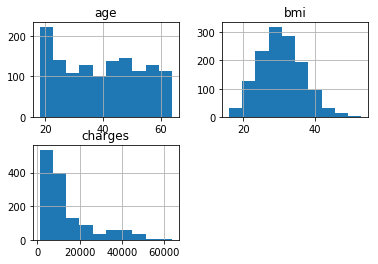

In [46]:
df_insurance[["bmi", "age", "charges"]].hist()

Can use distplot function as well for distibution

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


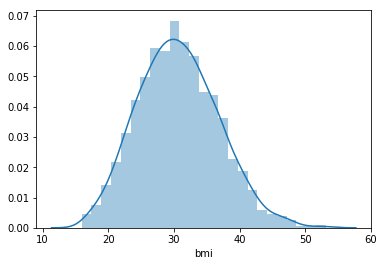

In [10]:
sns.distplot(df_insurance['bmi'])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


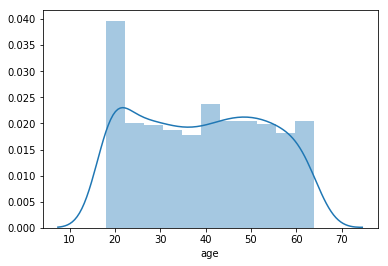

In [11]:
sns.distplot(df_insurance['age'])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


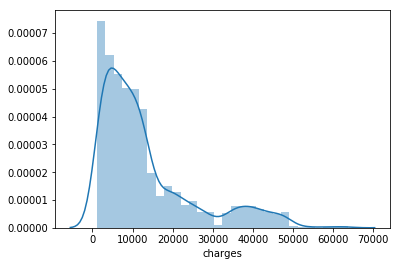

In [12]:
sns.distplot(df_insurance['charges'])

3f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [66]:
stats.skew(df_insurance.bmi)

0.28372857291709386

BMI is almost normally distributed. Skewness is very less

In [68]:
stats.skew(df_insurance.age)

0.055610083072599126

Age is uniformally distributed with hardly any skewness

In [69]:
stats.skew(df_insurance.charges)

1.5141797118745743

Highly skewed with right skewness

3g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges
columns

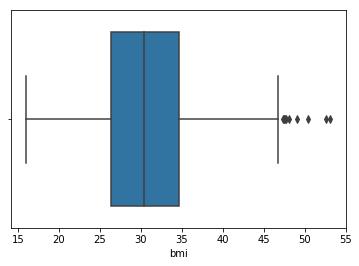

In [52]:
sns.boxplot(df_insurance["bmi"])

Ouliers present for bmi

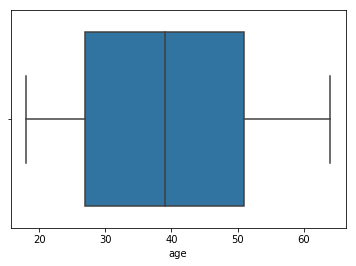

In [51]:
sns.boxplot(df_insurance["age"])

No ouliers present for Age

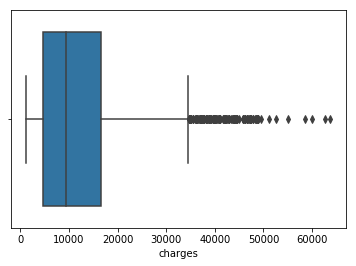

In [53]:
sns.boxplot(df_insurance["charges"])

Lot of Outliers present for charges

3h. Distribution of categorical columns

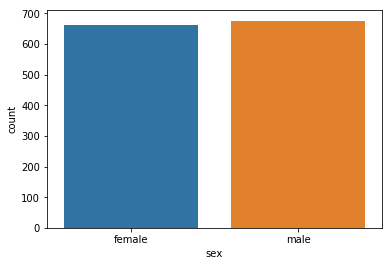

In [72]:
sns.countplot(df_insurance.sex)

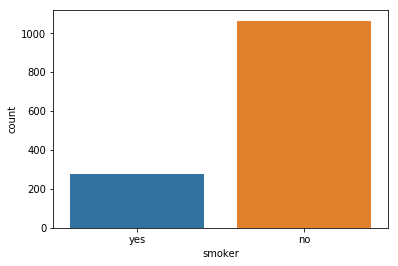

In [73]:
sns.countplot(df_insurance.smoker)

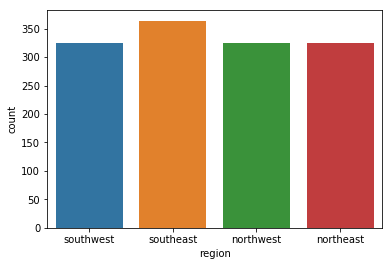

In [74]:
sns.countplot(df_insurance.region)

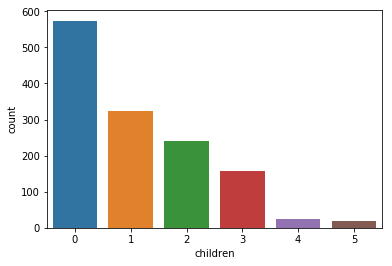

In [75]:
sns.countplot(df_insurance.children)

2i. Pair plot that includes all the columns of the data frame 

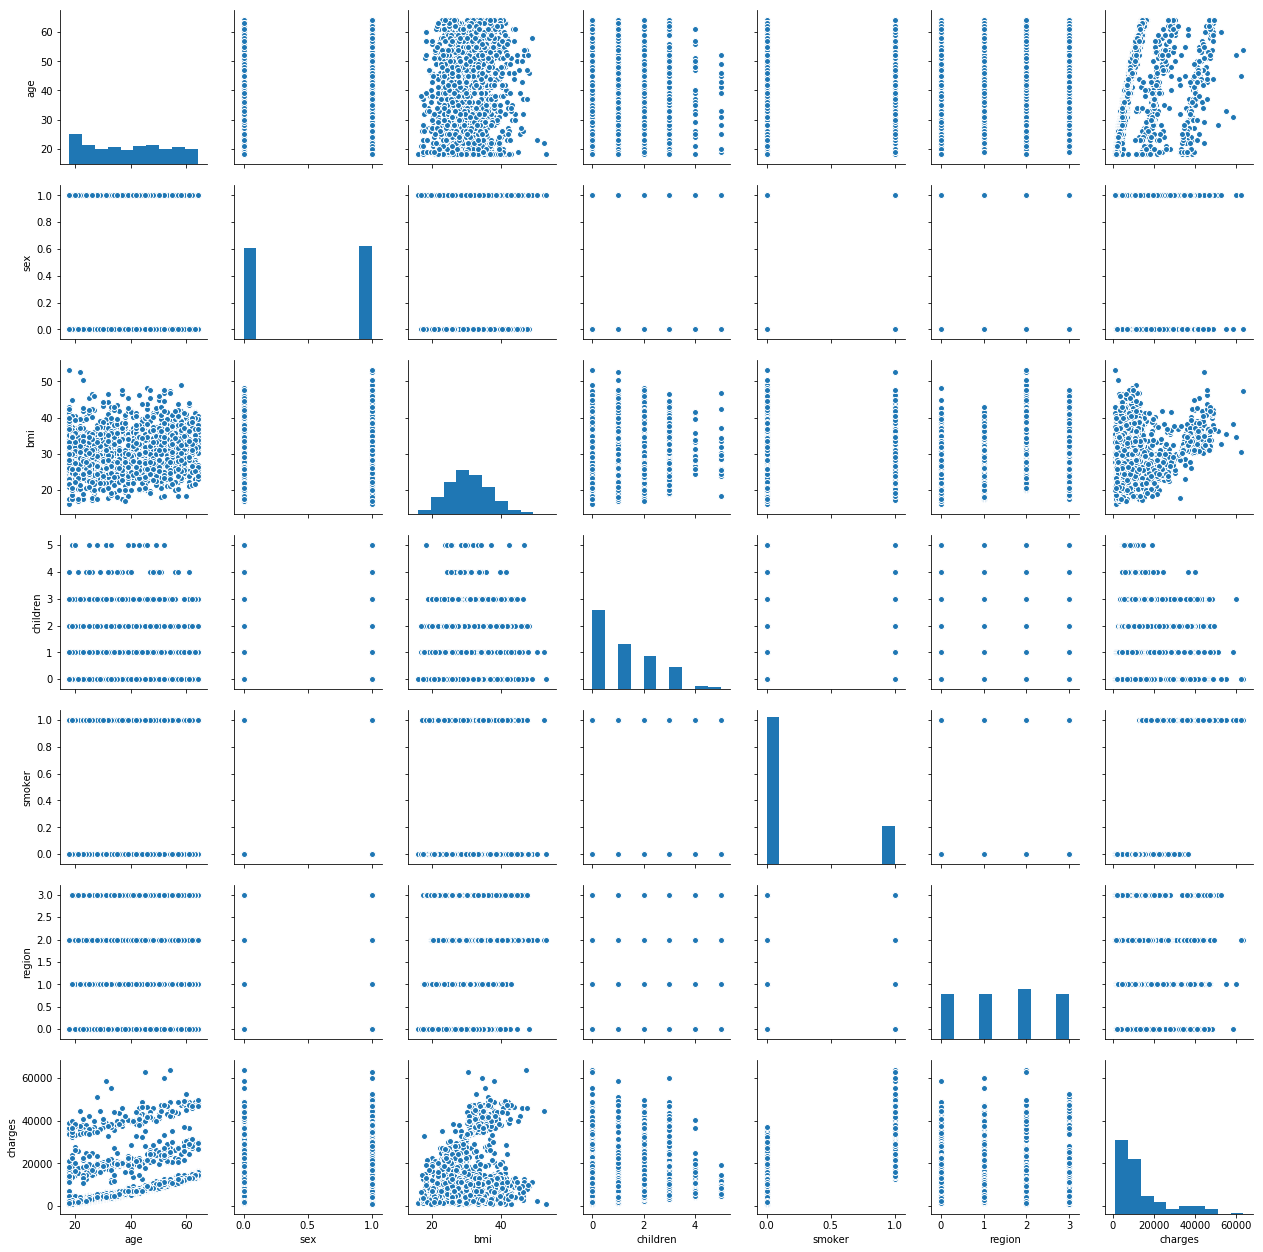

In [82]:
df_insurance_new = copy.deepcopy(df_insurance)
df_insurance_new.loc[:,['sex', 'smoker', 'region']] = df_insurance_new.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform)
sns.pairplot(df_insurance_new)

4a. Do charges of people who smoke differ significantly from the people who don't?

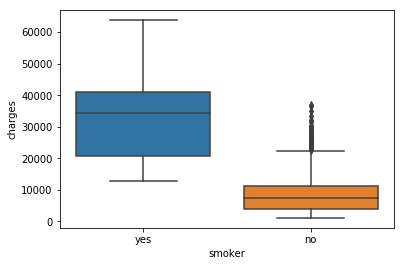

In [58]:
sns.boxplot(x = "smoker", y ="charges", data=df_insurance)

The above box plot shows the charges of smokers differ significantly from the people who dont smoke

In [24]:
#Hypothesis Test
H0 = "Charges of smokers and non-smokers are same";
H1 = "Charges of smokers and non-smokers are differ";
chargesOfSmokers = df_insurance[df_insurance.smoker == 'yes'].charges
chargesOfNonSmokers = df_insurance[df_insurance.smoker == 'no'].charges
#Two Sample Testing
t_statistic, p_value = stats.ttest_ind(chargesOfSmokers, chargesOfNonSmokers)
print('p_value: ', p_value)
#For Confidence level 99%
if p_value < .01:
     print('Reject Null hypothesis')
else:
    print('Fail to reject null hypothesis')

p_value:  8.271435842177219e-283
Reject Null hypothesis


Since p_value is less than .01 we reject null hypothesis.
Therefore we can say with 99% of confidence level that charges of people who smoke differ significantly from the people who don't
smoke

4b. Does bmi of males differ significantly from that of females?

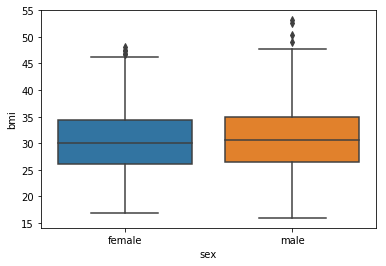

In [25]:
sns.boxplot(x = "sex", y ="bmi", data=df_insurance)

The above box plot shows the bmi of males does not differ significantly from that of females

In [30]:
#Hypothesis Test
H0 = "BMI of males and females is same"
H1 = "BMI of males differ from that of females"
bmiOfMales = df_insurance[df_insurance.sex == "male"].bmi
bmiOfFemales = df_insurance[df_insurance.sex == "female"].bmi

#Two sample testing
t_statistic, p_value = stats.ttest_ind(bmiOfMales, bmiOfFemales)
print('p_value: ', p_value)
if p_value < .01:
    print("Reject null hypothesis")
else:
    print("Failed to reject null hypothesis")


p_value:  0.08997637178984932
Failed to reject null hypothesis


Since p_value is greater than .01, we failed to reject null hypothesis. 
Therefore we can say with 99% confidence level that BMI of males and females does not differ

4c. Is the proportion of smokers significantly different in different
genders

In [36]:
H0 = "Proprtion of smokers is same in different genders"
H1 = "Proprtion of smokers is different in different genders"
contigencyTable = pd.crosstab(df_insurance.sex, df_insurance.smoker)
#Applyn Chi square test as it involves categorical variables
chi2, p, dof, expected = stats.chi2_contingency(contigencyTable)
print('p value: ', p)
if p < .01:
    print('Reject null hypothesis')
else:
    print("Failed to reject null hypothesis")


p value:  0.006548143503580696
Reject null hypothesis


Since p value is less than aplha (.01), we reject null hypothesis.
Therefore proportion of smokers significantly different in different genders

4d. Is the distribution of bmi across women with no children, one child and two children, the same? 

In [17]:
H0 = "Distribution of BMI is same across women woth 0,1,2 children"
H1 = "Distribution of BMI is not same across women with 0,1,2 children"
Bmi_FemaleZeroChildren = df_insurance[(df_insurance.sex == "female") & (df_insurance.children == 0)].bmi
Bmi_FemaleOneChildren = df_insurance[(df_insurance.sex == "female") & (df_insurance.children == 1)].bmi
Bmi_FemaleTwoChildren = df_insurance[(df_insurance.sex == "female") & (df_insurance.children == 2)].bmi
#Apply Anova test for as it involves continuous variables 
f_stat, p = stats.f_oneway(Bmi_FemaleZeroChildren, Bmi_FemaleOneChildren, Bmi_FemaleTwoChildren)
print('p value:', p)
if p < .01:
    print('Reject null hypothesis')
else:
    print("Failed to reject null hypothesis")

p value: 0.7158579926754841
Failed to reject null hypothesis


Since p value is not less than alpha value(.01), we failed to reject null hypothesis. Therefore can say with 99%v confidence level that distribution of bmi across women with no children, one child and two children is the same